<div style='background-color:red;color:white;padding:20px;text-align:center;font-size:20px'>  YOUTUBE API & ANALYSIS (PART II): ANALYSIS OF VIDEOS ABOUT FINLAND IN 2020
    </div>

<img src='https://d36fwkt2kp2fcf.cloudfront.net/blog/wp-content/uploads/2018/01/16115340/Finland-cover.jpg' width=1000px>

Analyst: Thuong Nguyen

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>   
<b>About Dataset:</b>
<p>
   Previously conducted API method, dataset is collected by pulling data from Youtube API of videos, videos meta data, channel metadata by using searching word 'Finland' in year 2020(1 Jan 2020 - 29 Dec 2020). After removing duplicate, 3 dataframes were merge to finally have dataset file 'youtubedata2240.csv'.</p>
    
   <p>Dataset contains 2240 rows and 13 columns. Dataset covers information of 2240 videos that have the word 'Finland' either in title, channel, description, tags. Since the columns' names explicitly present its meaning, giving explation about columns name is no longer necessary, and skipped in this part.</p>
<br>  
<b>Purpose of the report:</b>  
<p>
   This report aims After reading the difference between word 'Finland' in title, description, channel, the most accurate column that reflect video about Finland is in title. Later part of this report, I will extract only videos with keyword 'Finland' in 'title'.</p>
    </div>

# import necessary packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

#-----------
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

#------------
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
#--------------------------------------------#

# setting the notebook mode for plotly

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks

cf.set_config_file(theme="pearl")

#--------------
from wordcloud import WordCloud
from textblob import TextBlob, Word
from PIL import Image 

#----------
from ipywidgets import interact, interactive,fixed,interact_manual
import ipywidgets as widgets

#-----
from IPython.core.display import display, HTML

<div style='background-color:red;color:white;padding:20px;text-align:center;font-size:20px'>  LOAD, EXTRACT, PROCESS DATA
    </div>

## LOAD DATA FILE IN

In [2]:
DATA=pd.read_csv('youtubedata2240.csv',parse_dates=[2])
DATA.head()
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   video_id             2240 non-null   object        
 1   channel_title        2240 non-null   object        
 2   video_publish_date   2240 non-null   datetime64[ns]
 3   video_title          2240 non-null   object        
 4   video_description    2084 non-null   object        
 5   video_category       2240 non-null   int64         
 6   video_view_count     2221 non-null   float64       
 7   video_comment_count  2158 non-null   float64       
 8   video_like_count     2180 non-null   float64       
 9   video_dislike_count  2180 non-null   float64       
 10  video_tags           1531 non-null   object        
 11  country              1581 non-null   object        
 12  subscription_count   2053 non-null   float64       
dtypes: datetime64[ns](1), float64(5),

## decode youtube category

In [3]:
category={1:'Film & Animation',2:'Autos & Vehicles',10:'Music',15:'Pets & Animals',17:'Sports',19:'Travel & Events',20:'Gaming',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'Howto & Style',27:'Education',28:'Science & Technology',29:'Nonprofits & Activism',30:'Movies'}

list of categories: https://gist.github.com/dgp/1b24bf2961521bd75d6c

In [4]:
DATA.video_category=DATA.video_category.map(lambda x: category[x])

In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   video_id             2240 non-null   object        
 1   channel_title        2240 non-null   object        
 2   video_publish_date   2240 non-null   datetime64[ns]
 3   video_title          2240 non-null   object        
 4   video_description    2084 non-null   object        
 5   video_category       2240 non-null   object        
 6   video_view_count     2221 non-null   float64       
 7   video_comment_count  2158 non-null   float64       
 8   video_like_count     2180 non-null   float64       
 9   video_dislike_count  2180 non-null   float64       
 10  video_tags           1531 non-null   object        
 11  country              1581 non-null   object        
 12  subscription_count   2053 non-null   float64       
dtypes: datetime64[ns](1), float64(5),

In [6]:
DATA.head()

,video_id,channel_title,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_tags,country,subscription_count
0,-bgSMJwNxto,Rahman Vlogs,2020-01-18 13:45:28,Finland should be better than Portugal for tem...,"Finland temporary resident permit, how to get ...",People & Blogs,48485.0,451.0,1915.0,102.0,Finland visa|Finland workpermit visa|Finland s...,SA,NaN
1,j3AkWDQ2zHo,Bright Freak,2020-01-21 18:06:42,Amazing Places to Visit in Finland,Read the article here: Visit our website: http...,People & Blogs,4300.0,5.0,73.0,6.0,Finland|Bucket List|Scandinavia|Food|Nature|Th...,SE,5620.0
2,HQ08HOfWD9s,Ultimate knowledge,2020-01-06 05:09:38,finland amazing facts in hindi | Finland facts...,Finland is considered the happiest country in ...,Education,6766.0,7.0,109.0,13.0,finland country|finland city|finland capital|f...,IN,326000.0
3,72U886OlMpg,ABC News (Australia),2020-01-16 05:14:28,Finland facing the threat of Russian hackers |...,The Mueller report laid bare the extent of Rus...,News & Politics,5628.0,NaN,109.0,25.0,Australia|abc|abc news|news|finland|russia|hac...,AU,1240000.0
4,axoQ8G9hkPA,C Dream,2020-01-28 05:43:16,Finland seasonal work visa malayalam,oo USA visa malayalam https://youtu.be/mu2lEiV...,People & Blogs,26821.0,175.0,887.0,34.0,#c_dream\n#finland_work_visa_malayalam \n#citi...,IN,97500.0


# Extract only videos contains 'Finland' in title

In [7]:
DATA=DATA[DATA.video_title.str.contains('Finland')]

In [8]:
DATA.shape

(1754, 13)

In [9]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   video_id             1754 non-null   object        
 1   channel_title        1754 non-null   object        
 2   video_publish_date   1754 non-null   datetime64[ns]
 3   video_title          1754 non-null   object        
 4   video_description    1642 non-null   object        
 5   video_category       1754 non-null   object        
 6   video_view_count     1753 non-null   float64       
 7   video_comment_count  1695 non-null   float64       
 8   video_like_count     1712 non-null   float64       
 9   video_dislike_count  1712 non-null   float64       
 10  video_tags           1215 non-null   object        
 11  country              1241 non-null   object        
 12  subscription_count   1632 non-null   float64       
dtypes: datetime64[ns](1), float64(5),

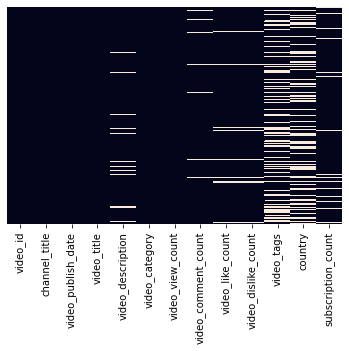

In [10]:
#have a look at our data, level of missing data
sns.heatmap(DATA.isna(),cbar=False,yticklabels=False)

In [11]:
# after considering, it only makes sense to drop missing values video_view_count
DATA.dropna(subset=['video_view_count'],inplace=True) 

In [12]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   video_id             1753 non-null   object        
 1   channel_title        1753 non-null   object        
 2   video_publish_date   1753 non-null   datetime64[ns]
 3   video_title          1753 non-null   object        
 4   video_description    1641 non-null   object        
 5   video_category       1753 non-null   object        
 6   video_view_count     1753 non-null   float64       
 7   video_comment_count  1694 non-null   float64       
 8   video_like_count     1711 non-null   float64       
 9   video_dislike_count  1711 non-null   float64       
 10  video_tags           1215 non-null   object        
 11  country              1241 non-null   object        
 12  subscription_count   1632 non-null   float64       
dtypes: datetime64[ns](1), float64(5),

<div style='background-color:red;color:white;padding:20px;text-align:center;font-size:20px'> FUNFACTS: TOP 10 YOUTUBE VIDEOS ABOUT FINLAND IN 2020</div>

# TOP 10 of year 2020 basing on view counts

In [13]:

data_10v=DATA.sort_values(by='video_view_count',ascending=False).iloc[:10,:]
#create figure secondary y
fig= make_subplots(specs=[[{'secondary_y':True}]])

#add traces
fig.add_trace(go.Bar(x=data_10v.video_title,y=data_10v.video_view_count,text=data_10v.video_view_count,
                     texttemplate='%{text:.2s}', textposition='outside',
                    name='View count'),secondary_y=False)
fig.add_trace(go.Scatter(mode='markers',x=data_10v.video_title,y=data_10v.video_like_count,text=data_10v.video_like_count,
                        name='like'),secondary_y=True)
fig.add_trace(go.Scatter(mode='markers',x=data_10v.video_title,y=data_10v.video_dislike_count,text=data_10v.video_dislike_count,
                        name='dislike'),secondary_y=True)

# adjust format
fig.update_xaxes(title_text='Video title',tickangle = 45, tickfont=dict(size=8))
fig.update_yaxes(title_text='Video view count',secondary_y=False)
fig.update_yaxes(title_text='Video like/dislike count',secondary_y=True)
fig.update_layout(title_text='Top 10 view count',title_font_size=20,width=800,height=800)
fig.show()


<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>
<p>If you look for typical videos about Finland in year 2020, this section can suggest you top 10 videos in which you can see information of view count, like/dislike count (a list is provided in the below table).
<p>
<li>In the top 10 videos by view count, you can look for positive (high like count) such as: Amazing Facts about Finland in Hindi,  Tom of Finland, Prisoners in Finland,...</li>
    <br>
<li>If you look within top 10 videos for the most controversial one: 'Tom of Finland' and 'Creativity REaches New Limits...', but like and dislike counts are close to each others, which at the end suggest the controversial points to look into.</li></p>
    </div>

In [14]:
data_10v[['channel_title','video_title','video_view_count','video_like_count','video_dislike_count']]

,channel_title,video_title,video_view_count,video_like_count,video_dislike_count
1045,Unknown Mysteries Hindi,फिनलैंड के इस वीडियो को एक बार जरूर देखे || Am...,6243963.0,146924.0,4945.0
8,xboytube,Tom Of Finland Service Station,6074134.0,9998.0,2641.0
1771,Insider News,Prisoners In Finland Live In Open Prisons Wher...,4184170.0,81698.0,3342.0
6,CNBC Make It.,Why Finland And Denmark Are Happier Than The U.S.,2937065.0,60018.0,1658.0
155,Colgate-Palmolive Europe,Colgate Total - Active Mineral Shield - Finland,2506503.0,NaN,NaN
1498,Pika Grape Snack,"1955 High School Exchange Students from Korea,...",1599555.0,107082.0,320.0
524,YRF,Making of War | Car Chase Action Sequence - Fi...,1429495.0,28523.0,794.0
1319,History Matters,Why didn&#39;t the USSR Annex Finland (Short A...,1189488.0,40018.0,623.0
686,Red Bull,Creativity Reaches New Limits At Red Bull Soap...,1018915.0,6550.0,338.0
495,Eurovision Song Contest,Aksel - Looking Back - Finland 🇫🇮 - Official V...,803759.0,14437.0,2179.0


# Top 10 videos basing on comment count

In [15]:
fig=px.bar(DATA.sort_values(by='video_comment_count',ascending=False).iloc[:10,[3,5,7]],x='video_title',
      y='video_comment_count',text='video_comment_count',color='video_category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Top 10 comment count',title_font_size=20,width=800,height=800)
fig.update_xaxes(tickangle = 45, tickfont=dict(size=8),title='video title')
fig.update_yaxes(title='video comment count')
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>
    <p>This part reveals which videos about Finland are louldly discussed or received bold attention in the youtube communities in year 2020.</p>

<p>We can see that 'Prisoners in Finland...' is the boldest one, followed by 'Why Finland and Denmark Are Happier...', and then '1955 High School Exchange...'</p>

<p>It would make sense to look for category of top 10 videos by comments, and our data shows somewhat relavance between content category and level of discussion (comment). Most oftenly discussed belongs to News & Politics, then Education, Gaming, and finally People&Blog, Entertainment, Travel&Events.</p> </div>

<div style='background-color:red;color:white;padding:20px;text-align:center;font-size:20px'> FOR YOUTUBE CONTENT CREATORS
    </div>

# WHAT CONTENT CREATORS THINK? vs WHAT AUDIENCE ACTUALLY CARE?

In [16]:
p=DATA.video_category.value_counts() # creators
v=DATA.groupby(['video_category'])['video_view_count'].mean() #audience
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig= make_subplots(rows=1,cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=p.index,values=p,name='Creators make'),1,1)
fig.add_trace(go.Pie(labels=v.index,values=round(v,0),name='Audience care'),1,2)

fig.update_traces(textinfo='percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)),hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="WHAT CONTENT CREATORS THINK? vs WHAT AUDIENCE ACTUALLY CARE?",width=800,height=600,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Creators', x=0.18, y=0.5, font_size=12, showarrow=False),
                 dict(text='Audience', x=0.82, y=0.5, font_size=12, showarrow=False)],
legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.2,
    xanchor="right",
    x=1))
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>


<p>The dominators of youtube Finland market 2020 belongs to People & Blogs, followed by Travel & Events, Sports, Entertainment.</p>

<p>However, Google reported that top 4 watched videos belongs to "comedy, music, entertainment, howto'. Are our youtube content creators are off the general rule? ---> Tracing the odd! </p>

<p>The answer is in "What viewers actually care?' pie chart, our data tells us that viewers actually watched top 4 from the highest view order: Education, News & Politics, Entertainment, Film & Animation.</p>

<p>RECOMMENDATION OF THEMES FOR CONTENT CREATORS TO HAVE MORE VIEWS:

Keep going on with:
    <li> Entertainment</li>

Switch focus to:
    <li> News & Polictics </li>
    <li> Education </li>
    <li> Film & Animation </li>
    

link:https://www.thinkwithgoogle.com/consumer-insights/consumer-trends/top-content-categories-youtube/ </p>
    </div>


# Networking for content creators

In [17]:
fig=px.bar(DATA[['channel_title','subscription_count']].drop_duplicates().iloc[:10],x='channel_title',y='subscription_count')
fig.update_layout(showlegend=False)
fig.update_xaxes(title='channel name')
fig.update_yaxes(title='subscription count')
fig.update_traces(marker_color=['red']*10)
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>
    Network with 10 channels have top subscription in 2020 to boost your channel views. 1 subscription is equal to one viewer, reachcing out and stay connected with high subcription channel will help content creators reach out to more audience. The number of subscription makes sense for networking in youtube world.
 </div>

# What to expect the view count for 1 video if you are a starter?

In [18]:
DATA.groupby(['video_category'])['video_view_count'].agg(['max','mean','min']).iplot()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>
    Depending on the content category you create your video, you can expect view count of your video from minimum, mean (average), to maximum.
    </div>

# When is the best time to post?

In [19]:
data_time=DATA[['video_publish_date','video_view_count']]

In [20]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   video_publish_date  1753 non-null   datetime64[ns]
 1   video_view_count    1753 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 121.1 KB


## When is the best time of a day to post?

In [21]:
data_time1=data_time.groupby(data_time.video_publish_date.dt.hour)['video_view_count'].sum()
fig=px.bar(data_time1,color=data_time1,color_continuous_scale=px.colors.sequential.Reds,text=data_time1)
fig.update_xaxes(title='video publish hour')
fig.update_yaxes(title='sum of view count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>
Recommend hours to post your video (from the best hour): 
    <li>15:00-15:59</li>
    <li>17:00-17:59</li>
    <li>2:00-2:59, 11:00-11:59</li>
    <i>Note that hour in this report is UTC time. If you are in Finland now, +2 hours more.</i>
</div>

## When is the best day of a week to post?

In [22]:
data_time2=data_time.groupby(data_time.video_publish_date.dt.strftime('%a'))['video_view_count'].agg(['sum','count','mean'])
fig=px.bar(data_time2,y='sum', color='sum',color_continuous_scale=px.colors.sequential.Reds,text='sum')
fig.update_xaxes(title='video publish date')
fig.update_yaxes(title='sum of view count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>
    Recomend day of week to post your video: <b>Saturday and Tuesday</b>
</div>

# After how long time after a video posted, how many view count per video content creators can expect?

In [23]:
fig = px.bar(data_time.set_index(keys='video_publish_date').resample('D').mean())
fig.update_layout(showlegend=False)
fig.update_xaxes(rangeslider_visible=True,
                         rangeselector=dict(buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ]))
                )
fig.update_yaxes(title='average view count per video per day')
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'> The graph with slide bar and buttons on the top to choose which time period since posting video you want to view. The graph shows avarage view count per video in a day.
</div>

# Which tags should content creators put in their videos?

In [24]:
li=DATA.video_tags.dropna().to_list()
tags=' '.join(li).replace('|',' ')

In [25]:
mask1 = np.array(Image.open("youtube.png"))
w=WordCloud(background_color="white",mask=mask1, width=600,
               height=400).generate(tags)

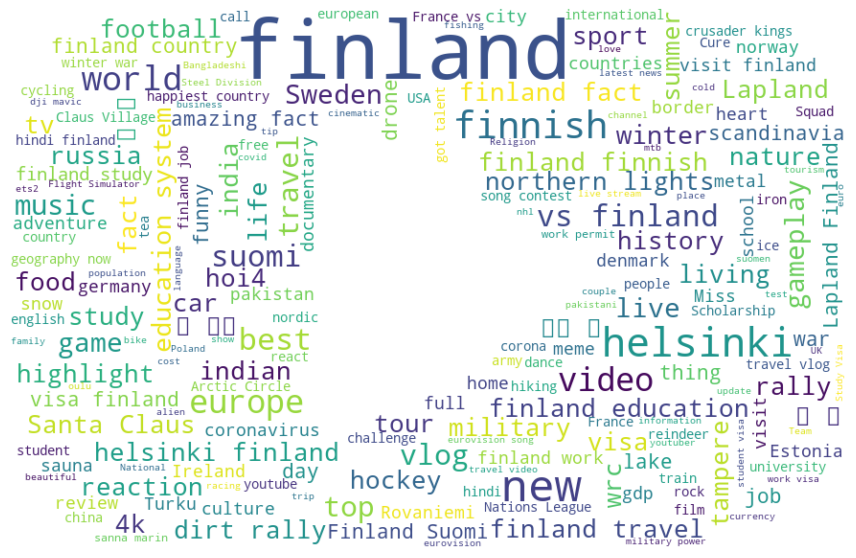

In [26]:
plt.figure(figsize=(20,10))
plt.imshow(w,interpolation="bilinear")
plt.axis('off')
plt.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:center;font-size:15px'> Recommend basing on most oftenly used tags:  #finland  #helsinki #finnish #new #suomi #world #top
    </div>

<div style='background-color:red;color:white;padding:20px;text-align:center;font-size:20px'>FOR PEOPLE IN FINLAND</div>

# Which countries contribute to make 'Finland' videos on youtube 2020?

In [27]:
DATA.country.isna().sum()

512

In [28]:
CT=DATA.country.dropna()
CT=CT.value_counts().reset_index()

In [29]:
import pycountry as pc

In [30]:
CT['alpha_3']=CT['index'].map(lambda x: pc.countries.get(alpha_2=x).alpha_3)

In [31]:
fig = px.scatter_geo(CT, locations="alpha_3",color='alpha_3',
                     hover_name="index", size="country",
                     projection="natural earth")
fig.show()

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:center;font-size:15px'>Top country: Finland first, US second, Great Britain third, India forth</div>

# HOW DO THE VIDEO TITLES ABOUT FINLAND SOUND LIKE? positive  |   negative   | neutral   

In [32]:
DATA.reset_index(drop=True,inplace=True)

In [33]:
sen=pd.DataFrame([TextBlob(x).sentiment for x in DATA.video_title])
data_sen=DATA.join(sen,how='inner')
p=round(data_sen.query('polarity>0').count()[0]*100/1753,2)
n=round(data_sen.query('polarity<0').count()[0]*100/1753,2)
m=round(data_sen.query('polarity==0').count()[0]*100/1753,2)

In [34]:
data_sen.head()

,video_id,channel_title,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_tags,country,subscription_count,polarity,subjectivity
0,-bgSMJwNxto,Rahman Vlogs,2020-01-18 13:45:28,Finland should be better than Portugal for tem...,"Finland temporary resident permit, how to get ...",People & Blogs,48485.0,451.0,1915.0,102.0,Finland visa|Finland workpermit visa|Finland s...,SA,NaN,0.5,0.5
1,j3AkWDQ2zHo,Bright Freak,2020-01-21 18:06:42,Amazing Places to Visit in Finland,Read the article here: Visit our website: http...,People & Blogs,4300.0,5.0,73.0,6.0,Finland|Bucket List|Scandinavia|Food|Nature|Th...,SE,5620.0,0.6,0.9
2,HQ08HOfWD9s,Ultimate knowledge,2020-01-06 05:09:38,finland amazing facts in hindi | Finland facts...,Finland is considered the happiest country in ...,Education,6766.0,7.0,109.0,13.0,finland country|finland city|finland capital|f...,IN,326000.0,0.6,0.9
3,72U886OlMpg,ABC News (Australia),2020-01-16 05:14:28,Finland facing the threat of Russian hackers |...,The Mueller report laid bare the extent of Rus...,News & Politics,5628.0,NaN,109.0,25.0,Australia|abc|abc news|news|finland|russia|hac...,AU,1240000.0,0.0,0.0
4,axoQ8G9hkPA,C Dream,2020-01-28 05:43:16,Finland seasonal work visa malayalam,oo USA visa malayalam https://youtu.be/mu2lEiV...,People & Blogs,26821.0,175.0,887.0,34.0,#c_dream\n#finland_work_visa_malayalam \n#citi...,IN,97500.0,0.0,0.0


In [ ]:
fig=px.bar(x=['Positive','Neutral','Negative'],y=[p,m,n],text=[p,m,n],title='Sentiment analysis 1',width=600,height=600)
fig.update_xaxes(title='Video tone')
fig.update_yaxes(title='Percentage')
fig.update_traces(textposition='outside',marker_color=['#00cc00','#000066', '#ff0000'])

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:center;font-size:15px'> Finland appears to be 'neutral' on Youtube, with 'positive' side higher than the 'negative' one. </div>

In [36]:
o=round(data_sen.query('subjectivity==0').count()[0]*100/1753,2)
s=round(data_sen.query('subjectivity!=0').count()[0]*100/1753,2)
fig=px.bar(x=['Objectivity','Subjectivity'],y=[o,s],text=[o,s],title='Sentiment analysis 2',width=600,height=600)
fig.update_xaxes(title='Video tone')
fig.update_yaxes(title='Percentage')
fig.update_traces(textposition='outside',marker_color=['#000066','#78909c'])


<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:center;font-size:15px'> Content creators tend to talk about Finland in a objective (fact-base) manner </div>

<div style='background-color:purple;color:white;padding:20px;text-align:center;font-size:20px'> EXPERIMENT: IS THERE ANY CORRELATION BETWEEN VIEW COUNT, LIKE, DISLIKE, COMMENT?</div>

<mark>In this step, it starts to make sense to drop missing value.

In [37]:
px.box(DATA.dropna().video_view_count)

In [38]:
data_test=DATA.dropna().query('video_view_count<17492')

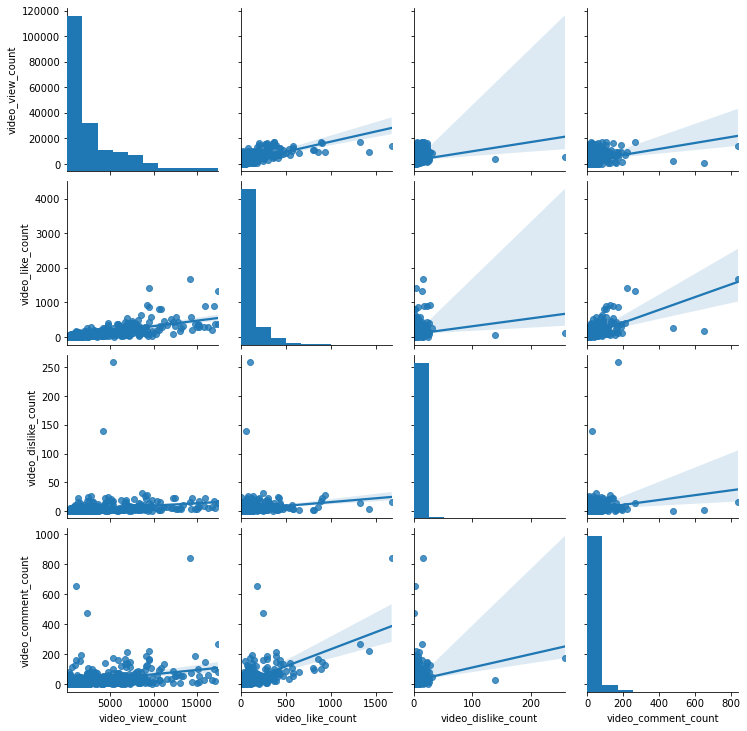

In [39]:
sns.pairplot(data=data_test[['video_view_count','video_like_count','video_dislike_count','video_comment_count']],kind='reg')

In [40]:
px.scatter_matrix(data_test,dimensions=['video_view_count','video_like_count','video_dislike_count','video_comment_count'],
                  color='video_category',height=800)

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>After checking by looking at scatter matrix, choosing to see all video categories and then each category, pairs of 'video_view_count' and 'video_like_count' in categories 'People & Blogs', 'News & Politics', 'Gaming' potentially contains sort of linear relationship. To this point, we dig into this sellected categories and see scatter plot of 'viet_count' and 'like_count' in the below graph. </div>

In [41]:
fig=data_test[data_test.video_category.isin(['People & Blogs','News & Politics','Gaming'])].iplot(kind='scatter',
  x='video_view_count',y='video_like_count', mode='markers',bestfit=True,bestfit_colors=['red'],xTitle='video view count',yTitle='video like count')

<div style='background-color:#ffe6ee;color:black;padding:20px;text-align:left;font-size:15px'>The linear relationship is not strongly seen in this graph. However, if we exclude some outliners which are far away from the majority data point and bestfitline, we can briefly see the relationship: 

            video_like_count=video_view_count * 0.03 -2.22
</div>